In [16]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# set initial seed for reproducability
np.random.seed(42)

Original Letters

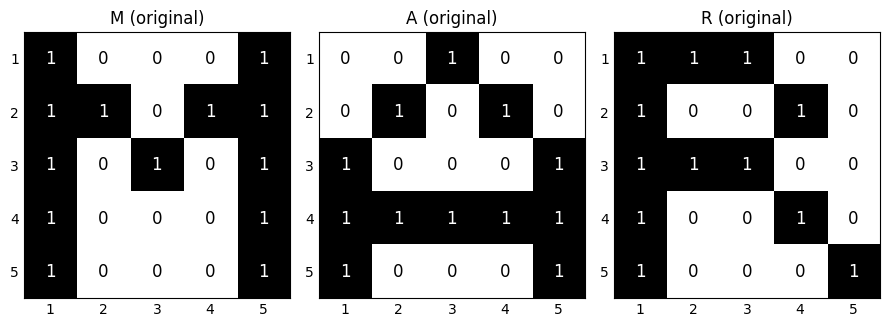

In [17]:
M = np.array([
    [1, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1]
])

A = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1]
])

R = np.array([
    [1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1]  
])


def plot_letters_vizualization(matrices, titles, figsize=(9, 3.5), annotate=True, savefig=True):
    """
    Plots multiple binary matrices side by side as pixel-art grids with optional annotations.

    Parameters:
    - matrices: list of 2D numpy arrays or lists
    - titles: list of titles for each matrix
    - figsize: tuple for figure size
    - annotate: bool, whether to write 0/1 inside each cell
    - savefig: bool, whether to save the figure as a PNG file
    """

    n = len(matrices)
    fig, axes = plt.subplots(1, n, figsize=figsize)

    # If only one matrix, axes is not a list
    if n == 1:
        axes = [axes]

    for ax, mat, title in zip(axes, matrices, titles):
        mat = np.array(mat)  # ensure numpy array
        im = ax.imshow(mat, cmap='gray_r', vmin=0, vmax=1, interpolation='nearest', origin='upper')

        # if we want the values written inside the cells
        if annotate:
            for (i, j), val in np.ndenumerate(mat):

                # colour opposite of the cell colour for readability
                txt_col = 'white' if val >= 0.5 else 'black'
                ax.text(j, i, str(np.round(val, 1)), ha='center', va='center', color=txt_col, fontsize=12)

        ax.set_title(title)
        ax.set_xticks(np.arange(mat.shape[1]))
        ax.set_yticks(np.arange(mat.shape[0]))
        ax.set_xticklabels(np.arange(1, mat.shape[1]+1))
        ax.set_yticklabels(np.arange(1, mat.shape[0]+1))
        ax.set_aspect('equal')
        ax.tick_params(length=0)

    plt.tight_layout()
    if savefig:
        title = "_".join(titles)
        plt.savefig(f"Letters/{title}.png")
    plt.show()

matrices = [M, A, R]
titles = ['M (original)', 'A (original)', 'R (original)']

plot_letters_vizualization(matrices, titles)

Variant 1

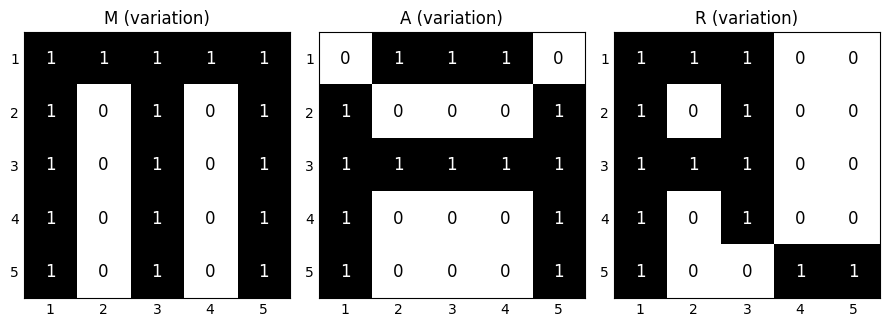

In [18]:
# letter variations
M_var = np.array([
 [1, 1, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1]
])

A_var = np.array([
 [0, 1, 1, 1, 0],
 [1, 0, 0, 0, 1],
 [1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1]
])

R_var = np.array([
 [1, 1, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 1, 1]
])

M_var = np.array(M_var)
A_var = np.array(A_var)
R_var = np.array(R_var)

matrices = [M_var, A_var, R_var]
titles = ['M (variation)', 'A (variation)', 'R (variation)']
plot_letters_vizualization(matrices, titles)

Variant 2

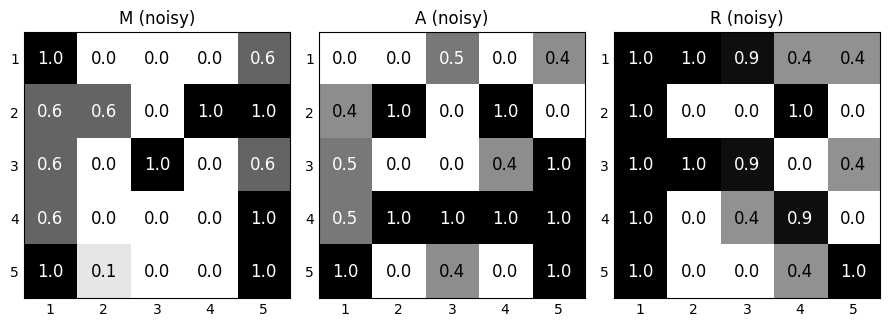

In [19]:
def add_noise(matrix, noise_probability=0.2, noise_strength=0.5):
    """
    Add random noise to the matrix
    """

    if noise_probability > 1 or noise_strength > 1:
        raise ValueError("Invalid input, noise_probability and noise_strength must be between 0 and 1")

    # randomly pick pixels to mess up by making a true/false matrix
    noise_occurrence = np.random.rand(*matrix.shape) < noise_probability

    # if originally pixel is 1 we subtract a random value between 0 and noise_strength
    # if pixel is 0, we add a random value bwtween 0 and noise_strength
    # only applied where noise_occurrence is true
    noise_mask = np.where(
        noise_occurrence,
        np.where(
            matrix > 0.5,
            -1 * np.random.rand() * noise_strength,
            np.random.rand() * noise_strength
        ),
        0
    )
    noisy_matrix = matrix + noise_mask
    return noisy_matrix
    
M_noisy = add_noise(M)
A_noisy = add_noise(A)
R_noisy = add_noise(R)


matrices_noisy = [M_noisy, A_noisy, R_noisy]
titles_noisy = ['M (noisy)', 'A (noisy)', 'R (noisy)']

plot_letters_vizualization(matrices_noisy, titles_noisy)

Variant 3 

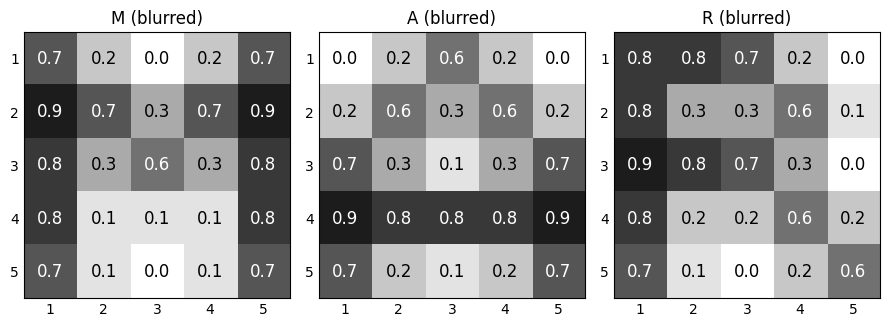

In [20]:
# define a 3x3 blur kernel
kernel = np.array([
    [0, 1, 0],
    [1, 5, 1],
    [0, 1, 0]
]) / 9.0 

# apply kernel to the matrix achiving the blur effect
def blur_matrix(matrix):
    return convolve(matrix.astype(float), kernel, mode='constant', cval=0.0)

# apply blur
M_blur = blur_matrix(M)
A_blur = blur_matrix(A)
R_blur = blur_matrix(R)

matrices = [M_blur, A_blur, R_blur]
titles = ['M (blurred)', 'A (blurred)', 'R (blurred)']

plot_letters_vizualization(matrices, titles)



Variant 4

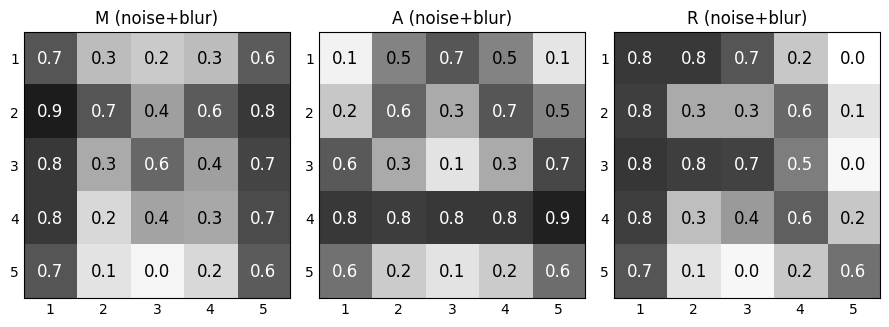

In [21]:
def noise_and_blur(matrix, noise_probability=0.2, noise_strength=0.5):
    """
    Add noise first, then blur the matrix.
    """
    noisy = add_noise(matrix, noise_probability=noise_probability, noise_strength=noise_strength)
    blurred = blur_matrix(noisy)
    return blurred

# apply combined transformation
M_nb = noise_and_blur(M)
A_nb = noise_and_blur(A)
R_nb = noise_and_blur(R)

matrices = [M_nb, A_nb, R_nb]
titles = ['M (noise+blur)', 'A (noise+blur)', 'R (noise+blur)']

plot_letters_vizualization(matrices, titles)

Correlation Matrix

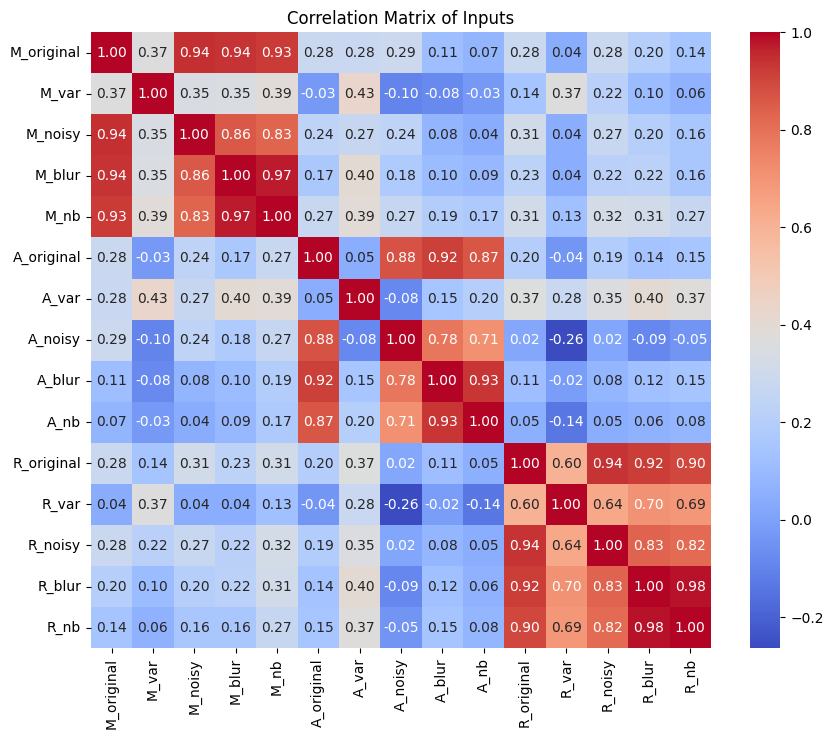

In [22]:
# collect all 12 versions
inputs = {
    "M_original": M, "A_original": A, "R_original": R,
    "M_var": M_var, "A_var": A_var, "R_var": R_var,
    "M_noisy": M_noisy, "A_noisy": A_noisy, "R_noisy": R_noisy,
    "M_blur": M_blur, "A_blur": A_blur, "R_blur": R_blur,
    "M_nb": M_nb, "A_nb": A_nb, "R_nb": R_nb
}

# flatten the vectors
vectors = {k: v.flatten().astype(float) for k, v in inputs.items()}

# Your labels for the 12 inputs
labels = ["M_original", "M_var", "M_noisy", "M_blur", "M_nb", "A_original", "A_var", "A_noisy", "A_blur", "A_nb", "R_original", "R_var", "R_noisy", "R_blur", "R_nb"]


# build DataFrame
df = pd.DataFrame(vectors, columns=labels)

# compute correlation
corr_matrix = df.corr()

# plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=labels, yticklabels=labels)
plt.title("Correlation Matrix of Inputs")
plt.show()

Dot product matrix

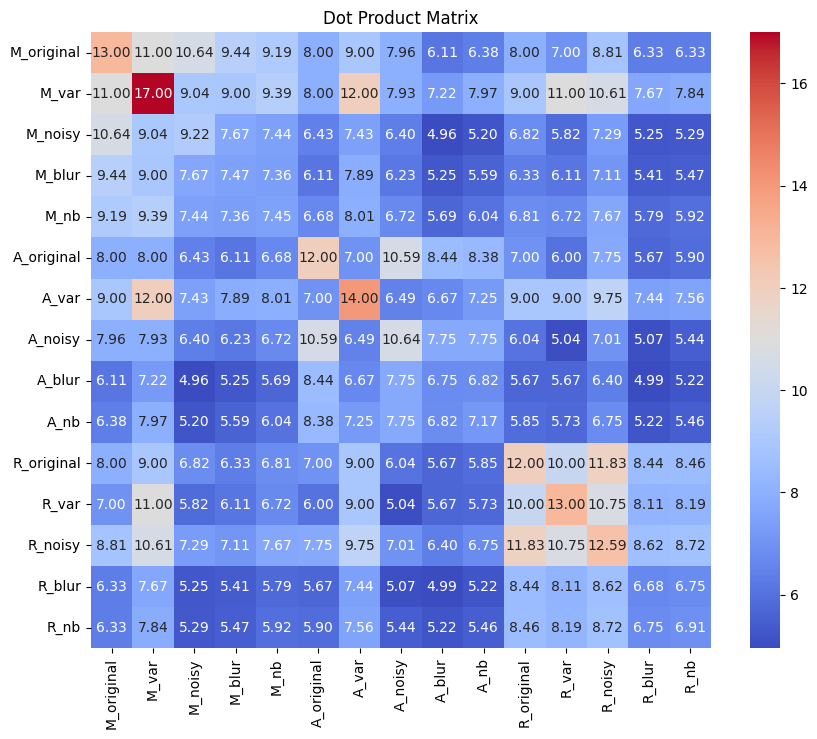

In [23]:
Dot_matrix = df.T.dot(df)

plt.figure(figsize=(10, 8))
sns.heatmap(Dot_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=labels, yticklabels=labels)
plt.title("Dot Product Matrix")
plt.show()

Prototype Classifier

In [24]:
def average_char(base, var, noisy, blur, nb):
    return np.mean([base.flatten(), var.flatten(), noisy.flatten(), blur.flatten(), nb.flatten()], axis=0)

M_avg = average_char(M, M_var, M_noisy, M_blur, M_nb)
A_avg = average_char(A, A_var, A_noisy, A_blur, A_nb)
R_avg = average_char(R, R_var, R_noisy, R_blur, R_nb)

# stack all prototypes together into a 3x25 matrix
NN1 = np.stack([M_avg, A_avg, R_avg])

print("NN1 matrix:\n", np.round(NN1, 2))

for name, vec in vectors.items():
    output = NN1 @ vec  # 3 scores
    print(f"{name}: {output}")

NN1 matrix:
 [[0.87 0.3  0.24 0.3  0.78 0.88 0.59 0.34 0.66 0.93 0.83 0.13 0.83 0.14
  0.82 0.83 0.05 0.29 0.09 0.9  0.87 0.06 0.21 0.05 0.86]
 [0.01 0.34 0.75 0.34 0.11 0.38 0.63 0.13 0.64 0.34 0.77 0.33 0.24 0.42
  0.88 0.84 0.71 0.71 0.71 0.95 0.84 0.09 0.13 0.09 0.85]
 [0.91 0.91 0.86 0.18 0.09 0.91 0.13 0.33 0.63 0.04 0.94 0.91 0.87 0.17
  0.09 0.91 0.1  0.41 0.62 0.09 0.87 0.04 0.01 0.38 0.82]]
M_original: [10.65506507  7.48995711  7.29386424]
A_original: [7.0442812  9.28376315 6.46185087]
R_original: [ 7.39323628  6.71154443 10.14545333]
M_var: [11.08628989  8.62422536  9.22335945]
A_var: [8.86615776 8.28109008 8.55073778]
R_var: [ 7.33025704  6.2868396  10.01037883]
M_noisy: [8.80163484 6.08250448 6.09613734]
A_noisy: [7.04803012 8.64422161 5.71777661]
R_noisy: [ 8.29772219  7.52986979 10.5015006 ]
M_blur: [8.18882175 6.21166608 6.08566847]
A_blur: [5.84473061 7.28673499 5.58818452]
R_blur: [6.09088957 5.67709774 7.72171526]
M_nb: [8.16675169 6.62806437 6.58398342]
A_nb: [6.233

Confusion Matrix

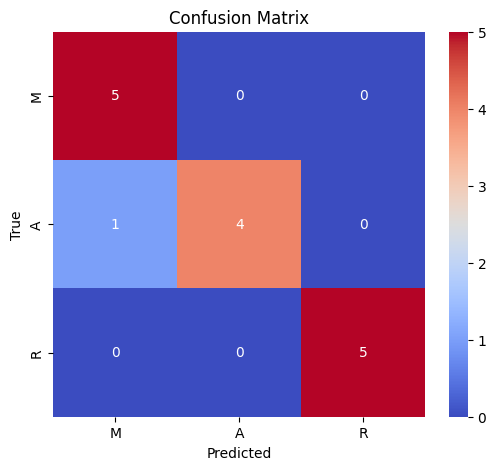

In [25]:
# confusion matrix
# true labels for the 12 inputs (M=0, A=1, R=2)
true_labels = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]  

# predicted labels using NN1
pred_labels = []
for name, vec in vectors.items():
    # get otput classification vector
    output = NN1 @ vec

    # add the index value of the largest value from the output vector to the predicted lables
    pred_labels.append(np.argmax(output))  

# compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=[0, 1, 2])

# plotting
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=['M','A','R'], yticklabels=['M','A','R'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Visualize Classification Scores

M_original: [10.65506507  7.48995711  7.29386424]
Predicted letter: M
Actual letter: M


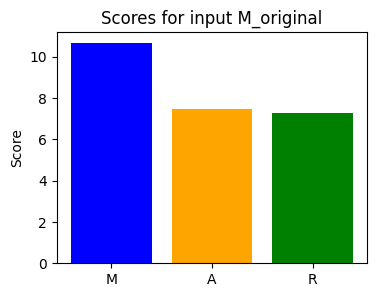

A_original: [7.0442812  9.28376315 6.46185087]
Predicted letter: A
Actual letter: A


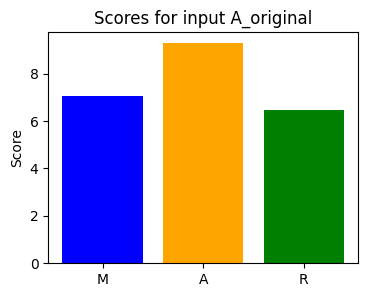

R_original: [ 7.39323628  6.71154443 10.14545333]
Predicted letter: R
Actual letter: R


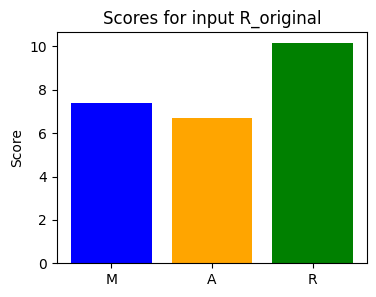

M_var: [11.08628989  8.62422536  9.22335945]
Predicted letter: M
Actual letter: M


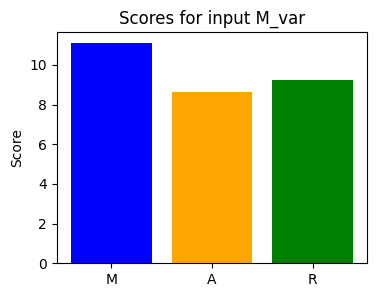

A_var: [8.86615776 8.28109008 8.55073778]
Predicted letter: M
Actual letter: A


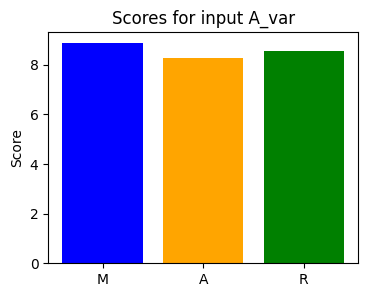

R_var: [ 7.33025704  6.2868396  10.01037883]
Predicted letter: R
Actual letter: R


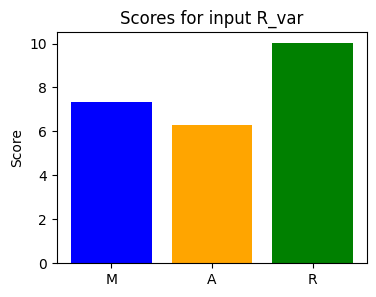

M_noisy: [8.80163484 6.08250448 6.09613734]
Predicted letter: M
Actual letter: M


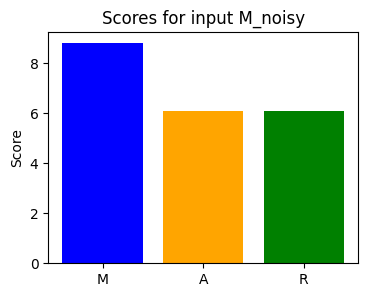

A_noisy: [7.04803012 8.64422161 5.71777661]
Predicted letter: A
Actual letter: A


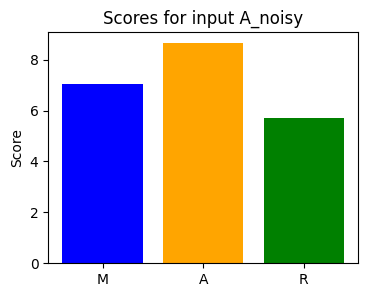

R_noisy: [ 8.29772219  7.52986979 10.5015006 ]
Predicted letter: R
Actual letter: R


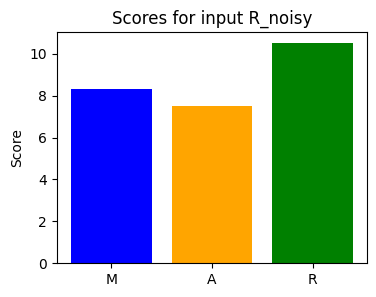

M_blur: [8.18882175 6.21166608 6.08566847]
Predicted letter: M
Actual letter: M


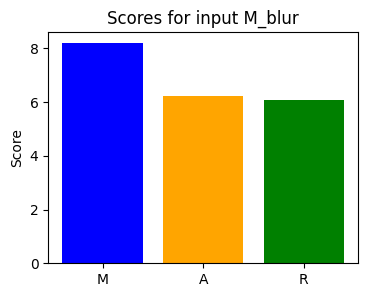

A_blur: [5.84473061 7.28673499 5.58818452]
Predicted letter: A
Actual letter: A


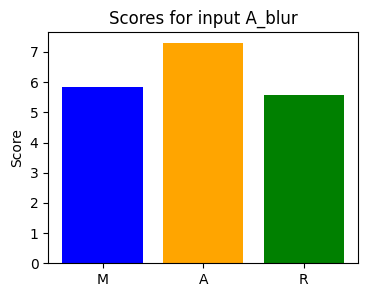

R_blur: [6.09088957 5.67709774 7.72171526]
Predicted letter: R
Actual letter: R


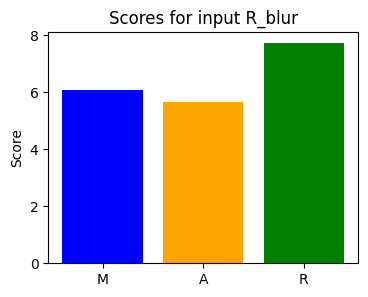

M_nb: [8.16675169 6.62806437 6.58398342]
Predicted letter: M
Actual letter: M


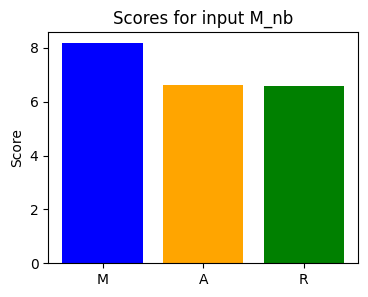

A_nb: [6.23321771 7.47429551 5.80290984]
Predicted letter: A
Actual letter: A


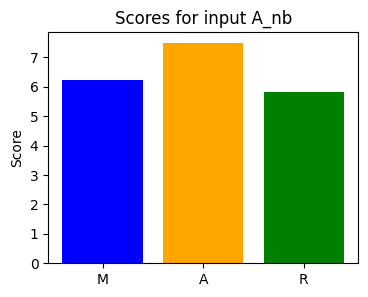

R_nb: [6.17090786 5.91610807 7.80619096]
Predicted letter: R
Actual letter: R


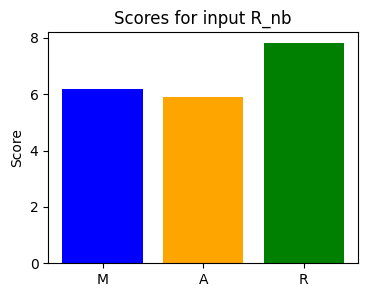

Successful classifications: 14
Failed classifications: 1
Accuracy: 93.33%


In [26]:
# to translate output index to letter
letter_dict = {0: 'M', 1: 'A', 2: 'R'}

# to make a simple bar chart of the scores for M, A, R
def plot_results(name, output):
    plt.figure(figsize=(4,3))
    plt.bar(['M','A','R'], output, color=['blue','orange','green'])
    # plt.axhline(y=7.3, color='red', linestyle='--', linewidth=1.5, label='Threshold = 7.3')
    # plt.text(x=0, y=7.3, s='Threshold = 7.3', color='red', va='bottom', ha='center')
    plt.title(f"Scores for input {name}")
    plt.ylabel("Score")
    plt.savefig(f"BarCharts/{name}.png")
    plt.show()

successful_classifications = 0
failed_classifications = 0

for name, vec in vectors.items():
    vec_flat = vec.flatten()
    output = NN1 @ vec_flat  # compute scores
    predicted_letter = letter_dict[np.argmax(output)]
    actual_letter = name[0]

    if predicted_letter == actual_letter:
        successful_classifications += 1
    else:
        failed_classifications += 1

    print(f"{name}: {output}")
    print(f"Predicted letter: {predicted_letter}")
    print(f"Actual letter: {actual_letter}")
    plot_results(name, output)

print(f"Successful classifications: {successful_classifications}")
print(f"Failed classifications: {failed_classifications}")
print(f"Accuracy: {successful_classifications / (successful_classifications + failed_classifications) * 100:.2f}%")

Test extreme and adversarial inputs

In [27]:
# create extreme cases
all_ones = np.ones(25)
all_zeros = np.zeros(25)

test_inputs = [all_ones, all_zeros]

# run the list of extreme cases throught the classifier
for test in test_inputs:
    output = NN1 @ test
    print(f"Test input:\n{test.reshape(5,5)}\n")
    print(f"Output scores: {output}")
    print(f"Classified as: {letter_dict[np.argmax(output)]}\n")

# Start with character M
M_test = M.flatten().copy()
for i in range(len(M_test)):
    M_test_single_flip = M_test.copy()
    M_test_single_flip[i] = 1 - M_test_single_flip[i]  # flip one pixel
    output = NN1 @ M_test_single_flip
    if np.argmax(output) != 0:  # M is index 0
        print(f"Changing pixel {i} misclassifies M: {output}")
        break


Test input:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Output scores: [12.87195294 12.24499569 12.20167144]
Classified as: M

Test input:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Output scores: [0. 0. 0.]
Classified as: M



Test confusing input

Rotated M_var: [9.01259641 7.4131285  9.8414952 ]
<class 'numpy.ndarray'>


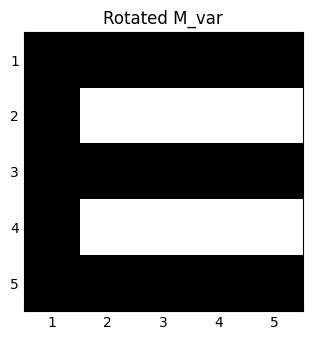

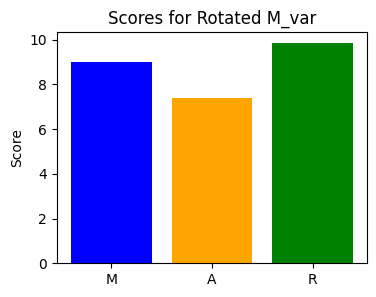

Rotated R_original: [6.87888379 5.94620174 6.08605583]
<class 'numpy.ndarray'>


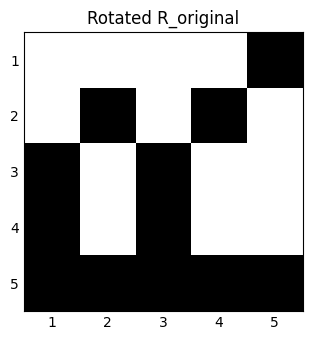

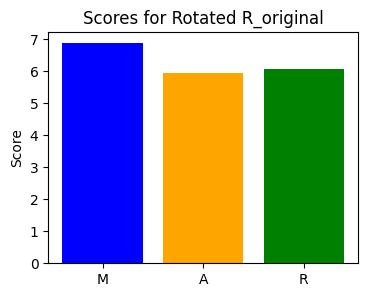

Confusing A: [6.62370573 5.4877189  8.81998299]
<class 'numpy.ndarray'>


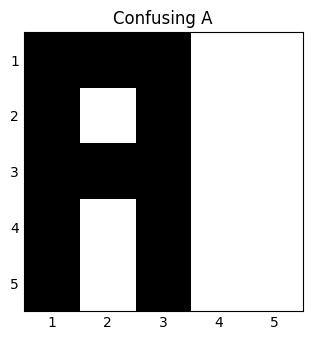

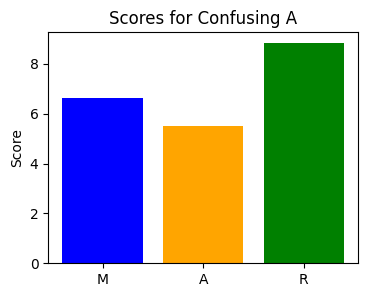

R_var with one pixel changed: [7.1969237  5.95350627 9.10335419]
<class 'numpy.ndarray'>


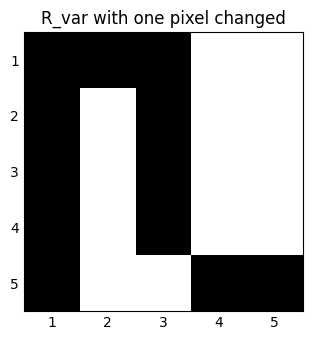

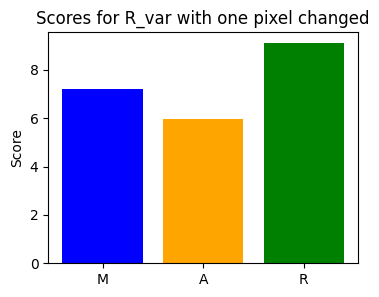

A_var with two pixels changed: [7.10734384 6.48137554 7.63962667]
<class 'numpy.ndarray'>


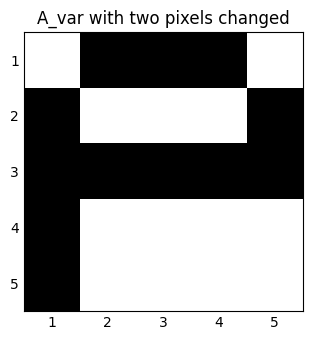

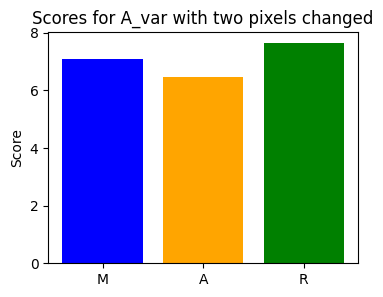

M with three pixels changed: [8.50400207 5.94736738 8.21891238]
<class 'numpy.ndarray'>


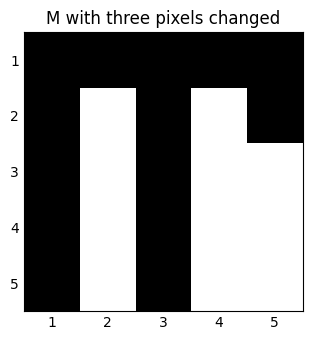

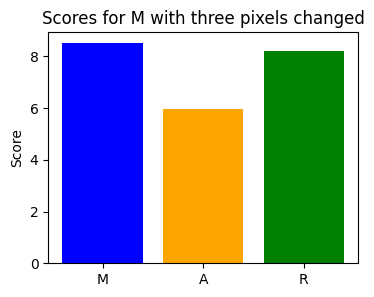

In [28]:
# rotated M_var
confusing_input1 = np.rot90(M_var,k=1)

# rotated R_original
confusing_input2 = np.rot90(R, k=1)

# confusing A
confusing_input3 = np.array([
    [1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 1, 0, 0] 
])

#changing one pixel of R_var
confusing_input4 = np.array([
 [1, 1, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 1, 1]
])


# changing two pixels of A_var
confusing_input5 = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]
])


# changing three pixels of M
confusing_input6 = np.array([
 [1, 1, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0]
])

names = ['Rotated M_var', 'Rotated R_original', 'Confusing A', 'R_var with one pixel changed', 'A_var with two pixels changed', 'M with three pixels changed']
test_matrices = [confusing_input1, confusing_input2, confusing_input3, confusing_input4, confusing_input5, confusing_input6]

for name, test in zip(names, test_matrices):
    vec_flat = test.flatten()
    output = NN1 @ vec_flat  # compute scores
    print(f"{name}: {output}")

    print(type(test))
    plot_letters_vizualization([test], [name], annotate=False)
    # plot bar chart
    plt.figure(figsize=(4,3))
    plt.bar(['M','A','R'], output, color=['blue','orange','green'])
    plt.title(f"Scores for {name}")
    plt.ylabel("Score")
    plt.show()


In [29]:
W = NN1.copy()

# Build difference matrix (2 x 25)
A = np.vstack([W[0] - W[1],
               W[0] - W[2]])   # (2,25)

# Compute nullspace with SVD
U, S, Vt = np.linalg.svd(A, full_matrices=True)
tol = 1e-10
rank = (S > tol).sum()
nullspace = Vt[rank:].T   # columns are basis vectors for nullspace; shape (25, 25-rank)

print("A shape:", A.shape)
print("Rank(A):", rank)
print("Nullspace dimension:", nullspace.shape[1])

# Produce some non-zero inputs (real-valued)
examples = []
for i in range(nullspace.shape[1]):
    v = nullspace[:, i]
    # scale for visibility
    v = v / np.max(np.abs(v))
    examples.append(v)

# Also make a few random linear combos of basis vectors
if nullspace.shape[1] >= 2:
    examples.append(nullspace[:,0] + 0.5 * nullspace[:,1])
    examples.append(2*nullspace[:,0] - 1.3 * nullspace[:,1])

# verify they produce equal outputs
for idx, x in enumerate(examples, start=1):
    out = W @ x
    print(f"Example {idx} outputs:", out.round(10))
    # check near-equality
    print("max difference between outputs:", np.max(out) - np.min(out))
    print("---")

# reshape to 5x5 for plotting/inspection
matrices_5x5 = [x.reshape(5,5) for x in examples]

A shape: (2, 25)
Rank(A): 2
Nullspace dimension: 23
Example 1 outputs: [0.74676119 0.74676119 0.74676119]
max difference between outputs: 2.220446049250313e-16
---
Example 2 outputs: [0.31773649 0.31773649 0.31773649]
max difference between outputs: 0.0
---
Example 3 outputs: [0.23848639 0.23848639 0.23848639]
max difference between outputs: 5.551115123125783e-17
---
Example 4 outputs: [0.54397014 0.54397014 0.54397014]
max difference between outputs: 1.1102230246251565e-16
---
Example 5 outputs: [0.599034 0.599034 0.599034]
max difference between outputs: 2.220446049250313e-16
---
Example 6 outputs: [0.18857518 0.18857518 0.18857518]
max difference between outputs: 8.326672684688674e-17
---
Example 7 outputs: [0.64461454 0.64461454 0.64461454]
max difference between outputs: 2.220446049250313e-16
---
Example 8 outputs: [0.46955045 0.46955045 0.46955045]
max difference between outputs: 2.7755575615628914e-16
---
Example 9 outputs: [0.80027162 0.80027162 0.80027162]
max difference betwe

Visualzie one example of equal output

Example from nullspace: [0.95798472 0.95798472 0.95798472]


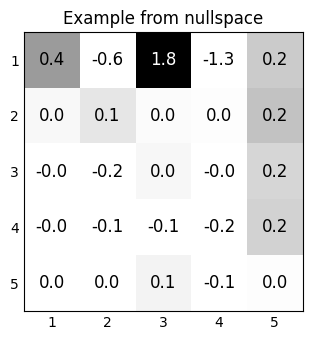

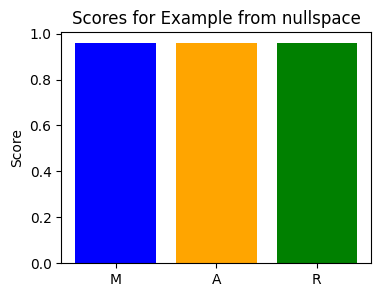

In [30]:
example = examples[24].reshape(5,5)
name = "Example from nullspace"
vec_flat = example.flatten()
output = NN1 @ vec_flat  # compute scores
print(f"{name}: {output}")

plot_letters_vizualization([example], [name], annotate=True)
# plot bar chart
plt.figure(figsize=(4,3))
plt.bar(['M','A','R'], output, color=['blue','orange','green'])
plt.title(f"Scores for {name}")
plt.ylabel("Score")
plt.show()